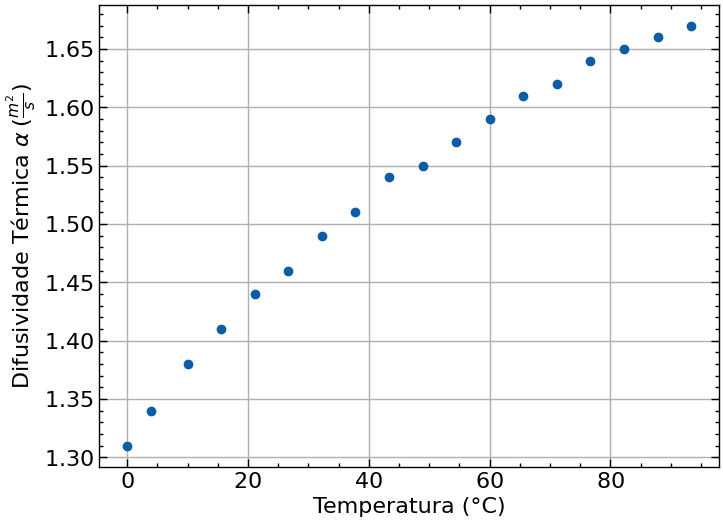

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scienceplots
plt.style.use(['science', 'notebook'])


T = np.array([0, 4, 10, 15.6, 21.1, 26.7, 32.2, 37.8, 43.3,
    48.9, 54.4, 60, 65.6, 71.1, 76.7, 82.2, 87.8, 93.3])
alpha = np.array([1.31, 1.34, 1.38, 1.41, 1.44, 1.46, 1.49, 1.51,
    1.54, 1.55, 1.57, 1.59, 1.61, 1.62, 1.64, 1.65, 1.66, 1.67])

plt.plot(T, alpha, 'o')
plt.xlabel('Temperatura (°C)')
plt.ylabel(r'Difusividade Térmica $ \alpha \; (\frac{{m^2}}{{s}})$')
plt.grid()
plt.show()

[-2.48992854e-05  6.08503806e-03  1.31723970e+00]


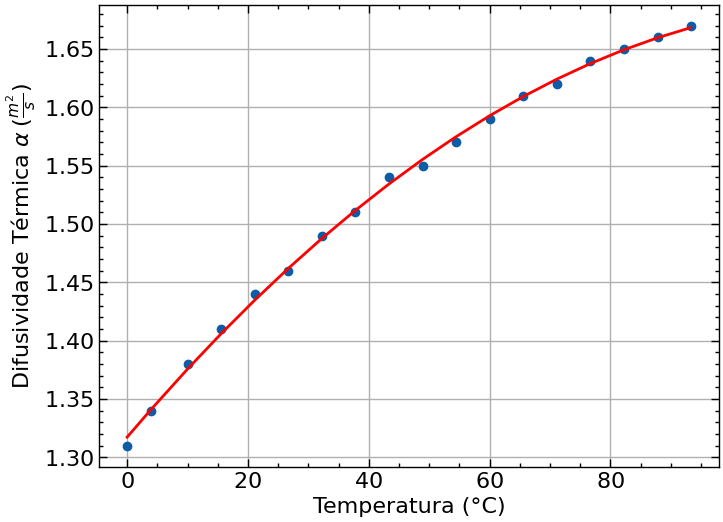

In [12]:
import numpy as np
from scipy.optimize import curve_fit

T = np.array([0, 4, 10, 15.6, 21.1, 26.7, 32.2, 37.8, 43.3,
        48.9, 54.4, 60, 65.6, 71.1, 76.7, 82.2, 87.8, 93.3])
alpha = np.array([1.31, 1.34, 1.38, 1.41, 1.44, 1.46, 1.49, 1.51,
        1.54, 1.55, 1.57, 1.59, 1.61, 1.62, 1.64, 1.65, 1.66, 1.67])

def func(T, a, b, c):
    return a * T**2 + b * T + c

popt, pcov = curve_fit(func, T, alpha)
print(popt)

plt.plot(T, alpha, 'o')
plt.plot(T, func(T, *popt), 'r-')
plt.xlabel('Temperatura (°C)')
plt.ylabel(r'Difusividade Térmica $ \alpha \; (\frac{{m^2}}{{s}})$')
plt.grid()
plt.show()

slope: -2303.876290    intercept: 4.018558
R-squared: 0.955014


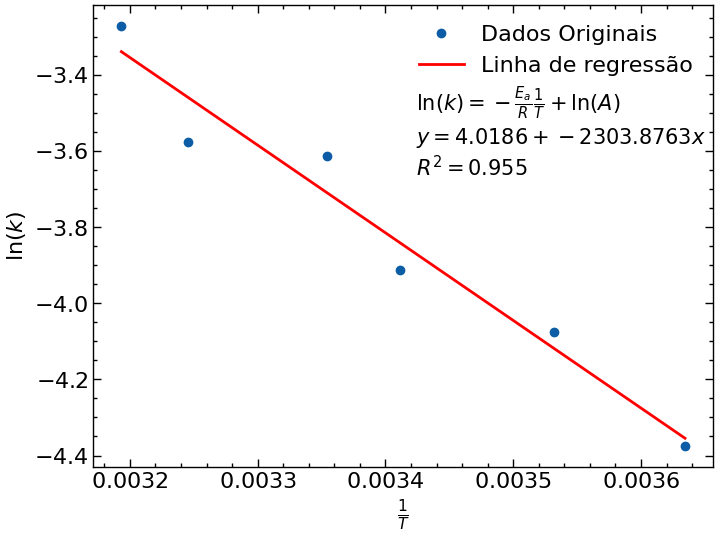

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

T = np.array([2, 10, 20, 25, 35, 40]) + 273.15
k = np.array([0.0126, 0.017, 0.020, 0.027, 0.028, 0.038])

y = np.log(k)
x = 1/T

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

print("slope: %f    intercept: %f" % (slope, intercept))
print("R-squared: %f" % r_value**2)
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(x, y, 'o', label='Dados Originais')
ax.plot(x, intercept + slope*x, 'r', label='Linha de regressão')
plt.xlabel(r'$\frac{{1}}{{T}}$')
plt.ylabel(r'$\ln(k)$')
ax.text(0.52, 0.77, r'$\ln(k) = -\frac{E_a}{R} \frac{1}{T} + \ln(A)$', fontsize=15,
         transform=ax.transAxes)
ax.text(0.52, 0.70, r'$y = {} + {}x$'.format(round(intercept, 4),
                                             round(slope, 4)), fontsize=15,
                                            transform=ax.transAxes)
ax.text(0.52, 0.63, r'$R^2 = {}$'.format(round(r_value**2, 4)), fontsize=15,
                                            transform=ax.transAxes)
plt.legend()

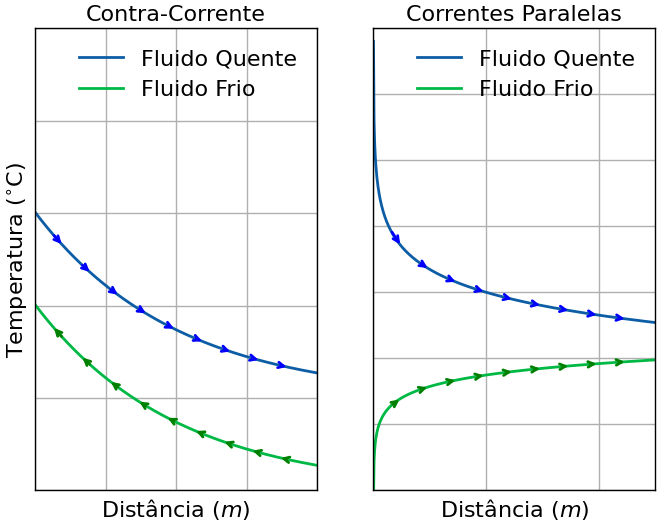

In [50]:
import matplotlib.pyplot as plt
import numpy as np
import scienceplots
plt.style.use(['science', 'notebook'])

x_para = np.linspace(-2, 2, 500)
y_para = np.exp(-0.5*x_para + 2) + 10
y_para_2 = np.exp(-0.5*x_para + 2)

x_contra = np.linspace(0.01, 50, 500)
y_contra = -10 * np.log(x_contra) + 70
y_contra_2 = 5 * np.log(x_contra)

fig, ax = plt.subplots(1,2, figsize=(8, 6))
ax[0].plot(x_para, y_para, label='Fluido Quente')
ax[0].plot(x_para, y_para_2, label='Fluido Frio')
ax[0].set_title('Contra-Corrente')
ax[0].set_xlim(-2, 2)
ax[0].set_ylim(0, 50)
ax[0].set_xlabel(r'Distância $(m)$')
ax[0].set_ylabel(r'Temperatura ($^{\circ}$C)')
ax[0].tick_params(which='both', labelbottom=False, labelleft=False,
                bottom=False, left=False, right=False, top=False,
                labeltop=False, labelright=False)
ax[0].grid()

for i in np.round(range(50,len(x_contra), 50)):
    ax[0].annotate("", xy=(x_para[i], y_para[i]),
                   xytext=(x_para[i-20], y_para[i-20]),
            xycoords='data', arrowprops=dict(arrowstyle="->",
                    connectionstyle="arc3", color='blue', lw=2))
    ax[0].annotate("", xy=(x_para[i-20], y_para_2[i-20]),
                   xytext=(x_para[i], y_para_2[i]),
            xycoords='data', arrowprops=dict(arrowstyle="->",
                    connectionstyle="arc3", lw=2, color='green'))

ax[0].legend(loc='best')
ax[1].plot(x_contra, y_contra, label='Fluido Quente')
ax[1].plot(x_contra, y_contra_2, label='Fluido Frio')
ax[1].set_title('Correntes Paralelas')
ax[1].set_xlim(0, 50)
ax[1].set_ylim(-20, 120)
ax[1].set_xlabel(r'Distância $(m)$')
ax[1].tick_params(which='both', labelbottom=False, labelleft=False,
                bottom=False, left=False, right=False, top=False,
                labeltop=False, labelright=False)
ax[1].grid()
for i in np.round(range(50,len(x_contra), 50)):
    ax[1].annotate("", xy=(x_contra[i], y_contra[i]),
                   xytext=(x_contra[i-20], y_contra[i-20]),
            xycoords='data', arrowprops=dict(arrowstyle="->",
                    connectionstyle="arc3", color='blue', lw=2))
    ax[1].annotate("", xy=(x_contra[i], y_contra_2[i]),
                   xytext=(x_contra[i-20], y_contra_2[i-20]),
            xycoords='data', arrowprops=dict(arrowstyle="->",
                    connectionstyle="arc3", lw=2, color='green'))
ax[1].legend(loc='best')


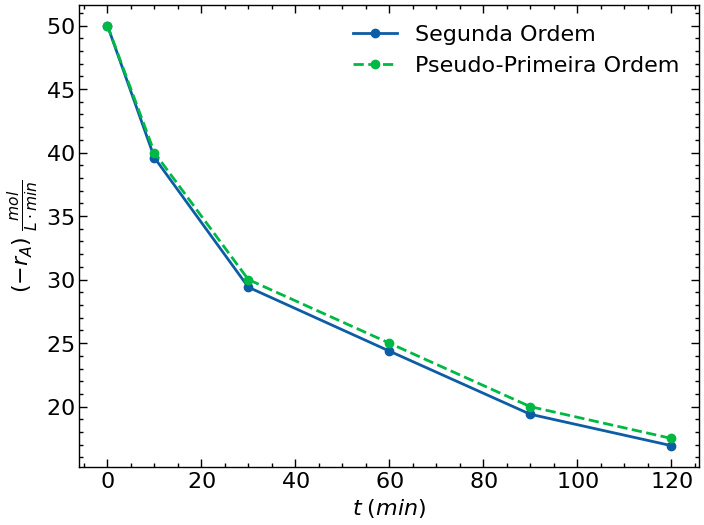

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
plt.style.use(['science', 'notebook'])

t = np.array([0, 10, 30, 60, 90, 120])
Ca = np.array([1, 0.8, 0.6, 0.5, 0.4, 0.35])
Cb = np.array([20, 19.8, 19.6, 19.5, 19.4, 19.35])

ra_seg = 2.5 * Ca * Cb
ra_pse = 50 * Ca

fig = plt.figure()
ax = fig.add_subplot()
ax.plot(t, ra_seg, 'o-', label='Segunda Ordem')
ax.plot(t, ra_pse, 'o--', label='Pseudo-Primeira Ordem')
plt.xlabel(r'$t \; (min)$')
plt.ylabel(r'$\left( -r_A \right) \; \frac{{mol}}{{L \cdot min}}$')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


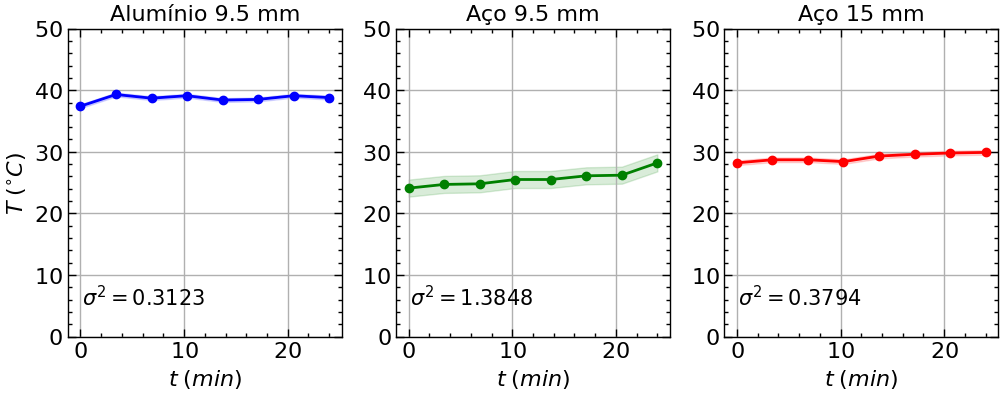

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
plt.style.use(['science', 'notebook'])

x = np.linspace(0, 24, 8)
y_al95 = np.array([37.4, 39.3, 38.7, 39.1, 38.4, 38.5, 39.1, 38.8])
y_aco95 = np.array([24.1, 24.7, 24.8, 25.5, 25.5, 26.1, 26.2, 28.2])
y_aco15 = np.array([28.2, 28.7, 28.7, 28.4, 29.3, 29.6, 29.8, 29.9])

var_yal95 = np.var(y_al95)
var_yaco95 = np.var(y_aco95)
var_yaco15 = np.var(y_aco15)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 4), sharex=True)

ax[0].plot(x, y_al95, 'o-', color='blue')
ax[0].set_xlabel(r'$t \; (min)$')
ax[0].set_ylabel(r'$T \; (^{\circ}C)$')
ax[0].fill_between(x, y_al95 - var_yal95, y_al95 + var_yal95,
                   color='blue', alpha=0.15)
ax[0].legend(loc='best')
ax[0].set_ylim(0, 50)
ax[0].text(0.05, 0.1, r'$\sigma^2 = {}$'.format(round(var_yal95, 4)),
              fontsize=15, transform=ax[0].transAxes)
ax[0].title.set_text('Alumínio 9.5 mm')
ax[0].grid()

ax[1].plot(x, y_aco95, 'o-', color='green')
ax[1].legend(loc='best')
ax[1].set_xlabel(r'$t \; (min)$')
ax[1].set_ylim(0, 50)
ax[1].fill_between(x, y_aco95 - var_yaco95, y_aco95 + var_yaco95,
                   color='green', alpha=0.15)
ax[1].text(0.05, 0.1, r'$\sigma^2 = {}$'.format(round(var_yaco95, 4)),
                fontsize=15, transform=ax[1].transAxes)
ax[1].title.set_text('Aço 9.5 mm')
ax[1].grid()

ax[2].plot(x, y_aco15, 'o-', color='red')
ax[2].title.set_text('Aço 15 mm')
ax[2].set_xlabel(r'$t \; (min)$')
ax[2].set_ylim(0, 50)
ax[2].fill_between(x, y_aco15 - var_yaco15, y_aco15 + var_yaco15,
                     color='red', alpha=0.15)
ax[2].text(0.05, 0.1, r'$\sigma^2 = {}$'.format(round(var_yaco15, 4)),
                fontsize=15, transform=ax[2].transAxes)
ax[2].grid()
plt.show()

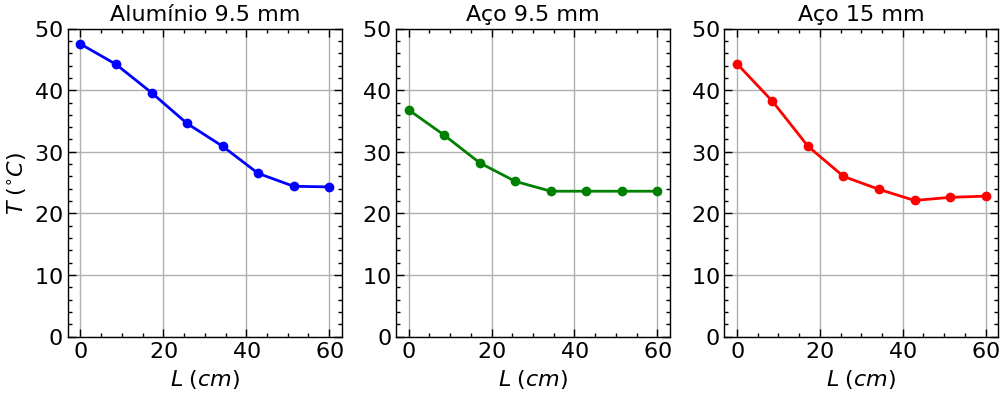

In [17]:
x = np.linspace(0, 60, 8)
l_al95 = np.array([47.5, 44.2, 39.6, 34.6, 30.9, 26.5, 24.4, 24.3])
l_aco95 = np.array([36.8, 32.7, 28.2, 25.2, 23.6, 23.6, 23.6, 23.6])
l_aco15 = np.array([44.3, 38.2, 30.9, 26, 23.9, 22.1, 22.6, 22.8])

var_lal95 = np.var(l_al95)
var_laco95 = np.var(l_aco95)
var_laco15 = np.var(l_aco15)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 4), sharex=True)

ax[0].plot(x, l_al95, 'o-', color='blue')
ax[0].set_xlabel(r'$L \; (cm)$')
ax[0].set_ylabel(r'$T \; (^{\circ}C)$')
# ax[0].legend(loc='best')
ax[0].set_ylim(0, 50)
# ax[0].fill_between(x, l_al95 - var_lal95, l_al95 + var_lal95,
                #    color='blue', alpha=0.15)
ax[0].title.set_text('Alumínio 9.5 mm')
ax[0].grid()

ax[1].plot(x, l_aco95, 'o-', color='green')
# ax[1].legend(loc='lower center')
ax[1].set_xlabel(r'$L \; (cm)$')
ax[1].set_ylim(0, 50)
# ax[1].fill_between(x, l_aco95 - var_laco95, l_aco95 + var_laco95,
                    #  color='green', alpha=0.15)
ax[1].title.set_text('Aço 9.5 mm')
ax[1].grid()

ax[2].plot(x, l_aco15, 'o-', color='red')
# ax[2].legend(loc='lower center')
ax[2].set_xlabel(r'$L \; (cm)$')
ax[2].set_ylim(0, 50)
# ax[2].fill_between(x, l_aco15 - var_laco15, l_aco15 + var_laco15,
                        # color='red', alpha=0.15)
ax[2].title.set_text('Aço 15 mm')
ax[2].grid()

plt.show()

60.52249999999999
